In [1]:
%matplotlib inline
import numpy as np
import scipy
from scipy.signal import hilbert, chirp, spectrogram, periodogram
import matplotlib.pyplot as plt

fs = 1e3
periods = 2
freq = 1

# Reference implementation

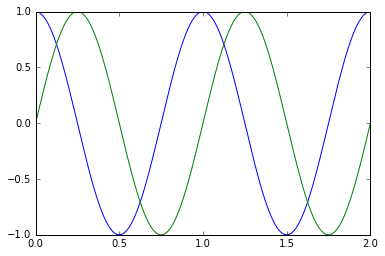

In [2]:
# phase_incremet = 2*np.pi*freq / fs
# time = np.arange(0, time_end*fs*phase_incremet, phase_incremet)
time = np.linspace(0, periods, fs*periods, endpoint=False) # NB! NOTICE ENDPOINT, TO MATCH GNURADIO

phase_angle = 2*np.pi*freq*time*1j
ref = np.exp(phase_angle)
# ref = np.exp(time*1j)
plt.plot(time, ref.real,time, ref.imag)

# CORDIC exp

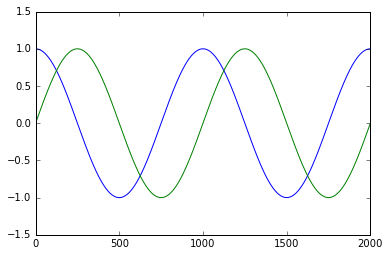

In [3]:
phase_incremet = 2*np.pi*freq / fs
from hwpy.common.cordic import CORDIC

cord = CORDIC(18)
res = cord.exp(phase_incremet, samples=int(fs*periods))

plt.plot([x.real for x in res])
plt.plot([x.imag for x in res])
plt.show()
    

# Compare

In [5]:
np.testing.assert_almost_equal(res, ref, decimal=5)